#### 1. How is the student performance affected based one their parents' education level and family size? 
This will explore the correlation between parental education level with the likelihood of students developing alcoholism and see reflect on how this affects students' school performance and develop a predictive model for this dataset. Finding out this correlation and being able to model this connection will help the education and health ministries to work together to take action to reduce the number of students who dropout of school, especially the first generation students who typically have low family educational awareness and larger family sizes. 






In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
s1 = pd.read_csv('student-mat.csv')
s2 = pd.read_csv('student-por.csv')
all_students = pd.concat([s1, s2], axis=0)
all_students.dropna()
all_students.dropna()
all_students['Harmful_Consumption'] = 0

all_students.loc[((all_students['Dalc'] + all_students['Walc'])>= 6), 
       'Harmful_Consumption'] = 1
all_students.to_csv('Data.csv')
all_students.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'Harmful_Consumption'],
      dtype='object')

In [237]:
#rt = ["famsize", "Pstatus", "studytime","famsup", "Medu", "famrel","Fedu", "Mjob","Fjob", "nursery","studytime", "failures", "goout", "absences", "G1", "G2", "G3" ]
ret = ["famsize", "studytime","famsup", "Medu", "famrel","Fedu", "Dalc", "freetime","goout", "Walc", "absences", "G1", "G2", "G3", "nursery","higher"]
my_dat = all_students.loc[:,ret]


In [238]:
# "nursery","higher"
dff = my_dat[my_dat["famsize"]=="LE3"]
ne_dt = dff[dff["nursery"]=="no"]
print(ne_dt.shape[0])
dff = my_dat[my_dat["famsize"]=="LE3"]
ne_dt1 = dff[dff["nursery"]=="yes"]
ne_dt1.shape[0]

42


264

In [239]:
# dff = my_dat[my_dat["famsize"]=="LE3"]
# ne_dt = dff[dff["higher"]=="no"]
# nn = ne_dt.shape[0]
# dff = my_dat[my_dat["famsize"]=="LE3"]
# ne_dt1 = dff[dff["higher"]=="yes"]
# nt = ne_dt1.shape[0]
# print("Total number of student from smaller family {}".format(nn+nt))
# print("Percentage of studnet from smaller family and are going to study higher {}".format(nt/(nn+nt)*100))


In [240]:
# dff = my_dat[my_dat["famsize"]=="GT3"]
# ne_dtt = dff[dff["nursery"]=="no"]
# wt = ne_dtt.shape[0]
# dff = my_dat[my_dat["famsize"]=="GT3"]
# ne_dt2 = dff[dff["nursery"]=="yes"]
# ww = ne_dt2.shape[0]
# print("Percentage of studnet from large family and are going to study nursery {}".format(ww/(ww+wt)*100))

In [241]:
# dff = my_dat[my_dat["famsize"]=="GT3"]
# ne_dtt = dff[dff["higher"]=="no"]
# rt = ne_dtt.shape[0] #.astype(float))
# dff = my_dat[my_dat["famsize"]=="GT3"]
# ne_dt2 = dff[dff["higher"]=="yes"]
# tt= ne_dt2.shape[0]
# print("Total number of studnets who are from large familt {}".format(tt+rt))
# print("The percentage of student from large family who go to higher education is {}".format(tt/(tt+rt)*100))

In [242]:
### From the above stastical analysis we can say that the family size does not have significant impact on studnet field of study. Based on the data almost equal percentage of student from both small and large family size are going to at higher education and smaller percentage of this student are going to study nursery

In [243]:
def famsup_mean(dt):
    """
    This function takes the data and returns the mean of students study time
    """
    my_dat_1 = dt[dt["famsup"]=="no"]
    ft1 = my_dat_1["studytime"].mean()
    print("The mean study time for student without family support {}".format(ft1))
    my_dat_2 = dt[dt["famsup"]=="yes"]
    ft2 = my_dat_2["studytime"].mean()
    print("The mean study time for student with family support {}".format(ft1))
# famsup_mean(my_dat)

In [244]:
# Testing the famsup_mean function
df = my_dat.iloc[1:6, 1:4]
dfd = df[df["famsup"]=="no"]
print("The actual mean {}".format(dfd["studytime"].mean()))
print("The mean from famsup_mean function:")
famsup_mean(dfd)

The actual mean 2.0
The mean from famsup_mean function:
The mean study time for student without family support 2.0
The mean study time for student with family support 2.0


In [245]:
famsup_mean(my_dat)

The mean study time for student without family support 1.8193069306930694
The mean study time for student with family support 1.8193069306930694


In [246]:
def famsz_study_time(dt):
    """
    This function takes the data, manipulate it and returns
    the mean of study time for students from different family background
    """
    my_dat_fs1 = dt[dt["famsize"]=="LE3"]
    print("The mean study time for student with less family size {}".format(my_dat_fs1["studytime"].mean()))
    my_dat_fs2 = dt[dt["famsize"]=="GT3"]
    print("The mean study time for student with large family size {}".format(my_dat_fs2["studytime"].mean()))
# famsz_study_time(my_dat)

In [247]:
# Testing famsz_study_time function with smaller dataset 
dff = my_dat.iloc[:10, :5]
dff1 = dff[dff["famsize"]=="LE3"]
dff2 = dff[dff["famsize"]=="GT3"]
print("Testing one data actual mean is {}".format(dff1["studytime"].mean()))
print("Testing two data actual mean is {}".format(dff2["studytime"].mean()))
print("The both testing data mean from famsz_study_time function repectively:")
famsz_study_time(dff)

Testing one data actual mean is 2.0
Testing two data actual mean is 2.1666666666666665
The both testing data mean from famsz_study_time function repectively:
The mean study time for student with less family size 2.0
The mean study time for student with large family size 2.1666666666666665


In [248]:
famsz_study_time(my_dat)

The mean study time for student with less family size 1.9248366013071896
The mean study time for student with large family size 1.989159891598916


#### The above calculation shows that the mean of study time for student from different family size is almost the same. This shows that the family size does not have that much impact on students study hours

In [249]:
my_dat_f1 = my_dat[(my_dat["famsize"]=="LE3") & (my_dat["famsup"]=="no")]
my_dat_f2 = my_dat[(my_dat["famsize"]=="LE3") & (my_dat["famsup"]=="yes")]
my_dat_f3 = my_dat[(my_dat["famsize"]=="GT3")& (my_dat["famsup"]=="yes")]
my_dat_f4 = my_dat[(my_dat["famsize"]=="GT3")& (my_dat["famsup"]=="no")]
st_per = my_dat_f2.shape[0]/(my_dat_f1.shape[0] + my_dat_f2.shape[0])*100
print("Percentage of students with small family size that get family support, {}".format(st_per))
st_per_rt = my_dat_f3.shape[0]/(my_dat_f3.shape[0] + my_dat_f4.shape[0])*100
print("Percentage of students with large family size that get family support, {}".format(st_per_rt))
print("The above percntage shows that family size has some impact on the student"
      "sucess, especially if the students have sibling, they will more likely to study more"
     "This could be there will be enough family member to help the student")



Percentage of students with small family size that get family support, 56.209150326797385
Percentage of students with large family size that get family support, 63.41463414634146
The above percntage shows that family size has some impact on the studentsucess, especially if the students have sibling, they will more likely to study moreThis could be there will be enough family member to help the student


### Modifing the Data for a Better Visulaization 

In [250]:
# Change all grade score in to one mean grade column
rt = ["famsize", "studytime","famsup", "Medu", "famrel","Fedu", "Dalc", "Walc", "absences", "G1", "G2", "G3"]
my_dat = all_students.loc[:,rt]
ty = ["G1", "G2", "G3"]
new_dt = my_dat[ty]
new_dt.mean(axis = 1)
my_dat["Mean_Grade"] = new_dt.mean(axis=1)
# my_dat

## Family Size and Students School Performance

In [265]:
# Histogram plots
def hist_func(dt, N_pt, n):
    """
    This function takes data, number of point, and bins and
    returns the histogram plot of mean grade score students from different family size
    """
    N_points = 1000
    n_bins = 20
    x = my_dat[my_dat["famsize"]=="LE3"]
    x = x["Mean_Grade"]
    y = my_dat[my_dat["famsize"]=="GT3"]
    y = y["Mean_Grade"]
    fig, axs = plt.subplots(1, 2, sharey=True,figsize = (15, 9), tight_layout=True)
    # We can set the number of bins with the `bins` kwarg
    axs[0].hist(x, bins=n_bins)
    axs[0].set_title("The student from smaller family size Mean_Grade")
    # 
    axs[1].hist(y, bins=n_bins)
    axs[1].set_title("The student from larger family size Mean_Grad")
    axs[0].grid()
    axs[1].grid()

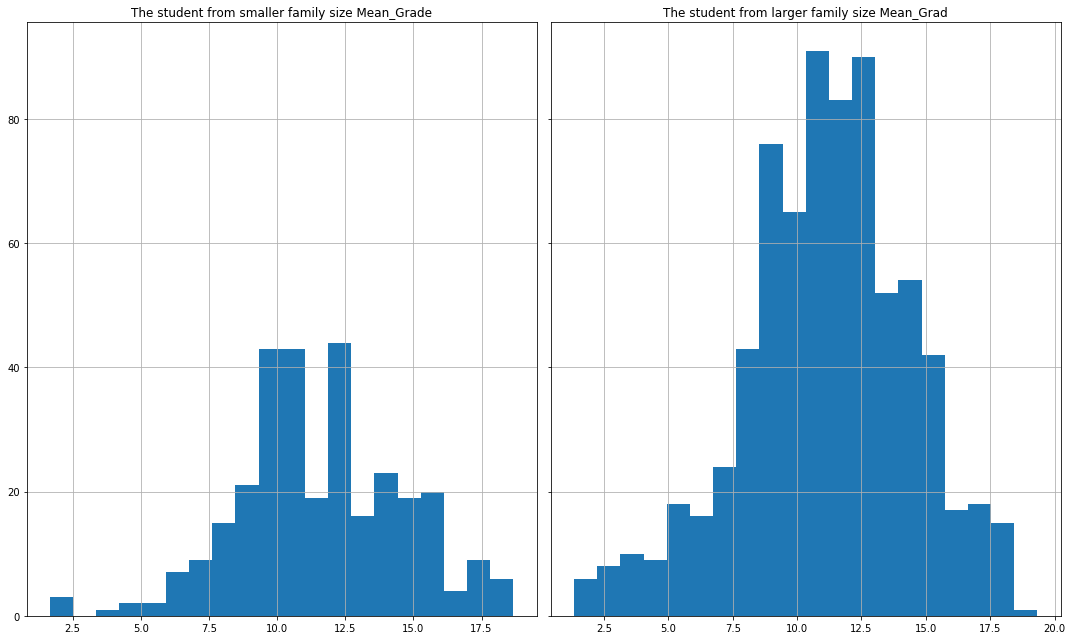

In [266]:
hist_func(my_dat, 1000,20)

In [267]:
def scat_plot_func(dt):
    plt.scatter(my_dat["studytime"], my_dat["Mean_Grade"]
    , s=my_dat["G3"])
    plt.xlabel("Study Time")
    plt.ylabel("Mean Grade Score")
    plt.title("The Scatter Plot Study Time vs Mean Grade Score")
    plt.grid()



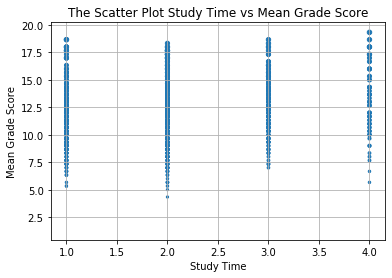

In [268]:
scat_plot_func(my_dat)

## Parents Education and Students School Performance

In [269]:
def famedu_grad_plt(dt):
    """
    This function takes the data and generate a line
    plot for parents education level and mean grade score
    """
    ne_data = dt.drop(["famsize", "famsup"], axis = 1)
    sns.relplot(x = "Fedu", y = "Mean_Grade", data = ne_data, kind = "line")
    plt.title('Father education vs. mean period grade')
    plt.ylabel("mean period grade")
    plt.grid()
    sns.relplot(x = "Medu", y = "Mean_Grade", data = ne_data, kind = "line")
    plt.title('Mother education vs. second period grade')
    plt.grid()

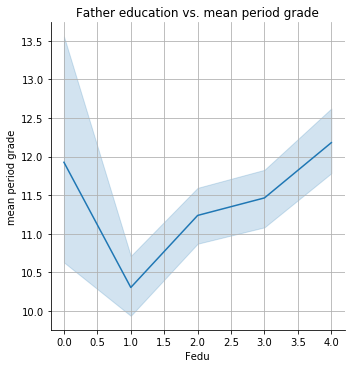

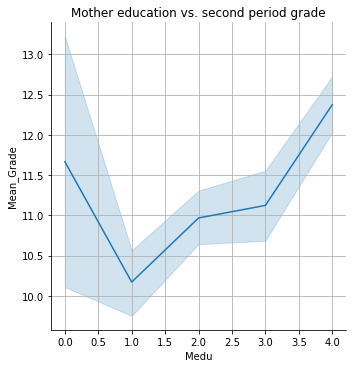

In [270]:
famedu_grad_plt(my_dat)

###. Reduce the smaller datasets such  as there are only 17 students who are from family with zero education. So droping these smaller datasets will give a better plot that shows the association between the aprents education and students perfomance inc school. The following plot show that the parents education level have posetive association.

In [271]:

def modified_plot(dt):
    """
    This function takes the data, modify it and generate a line
    plot for parents education level and mean grade score
    """
    ne_data = dt.drop(["famsize", "famsup"], axis = 1)
    new_data = ne_data[(ne_data["Fedu"]!=0) & (ne_data["Medu"]!=0)]
    sns.relplot(x = "Fedu", y = "Mean_Grade", data = new_data, kind = "line")
    plt.title('Father education vs. Mean grade score')
    plt.ylabel("mean period grade")
    plt.grid()
    sns.relplot(x = "Medu", y = "Mean_Grade", data = new_data, kind = "line")
    plt.title('Mother education vs. Mean grade score')
    plt.grid()

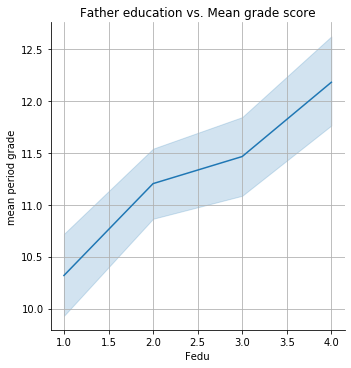

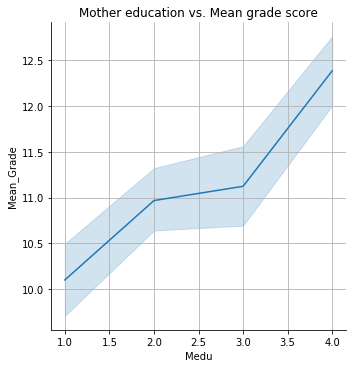

In [272]:
modified_plot(my_dat)

## Alcohol Consumption and Family educations level

In [273]:
# Line plot parents education level and students alcohol consumption
def lin_plt_famedu_alc(dt):
    ne_data = my_dat.drop(["famsize", "famsup"], axis = 1) # Select the target data
    # Plotting the sns for the given data
    sns.relplot(x = "Fedu", y = "Dalc",data =ne_data, kind = "line")
    plt.title("Father education vs Weekend alcohol consumption of students")
    plt.grid() # add the gride 
    sns.relplot(x = "Fedu", y = "Walc",data =ne_data, kind = "line")
    plt.title("Father education vs Weekday alcohol consumption of students")
    plt.grid()
    sns.relplot(x = "Medu", y = "Dalc",data =ne_data, kind = "line")
    plt.title("Mother education vs Weekend alcohol consumption of students")
    plt.grid()
    sns.relplot(x = "Medu", y = "Walc",data =ne_data, kind = "line")
    plt.title("Mother education vs Weekday alcohol consumption of students")
    plt.grid()

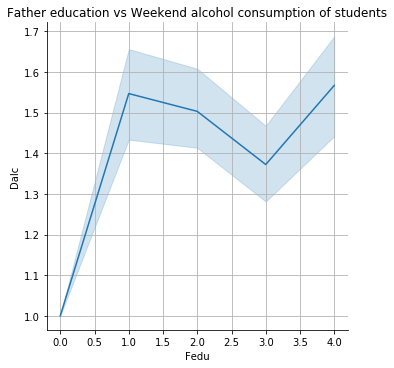

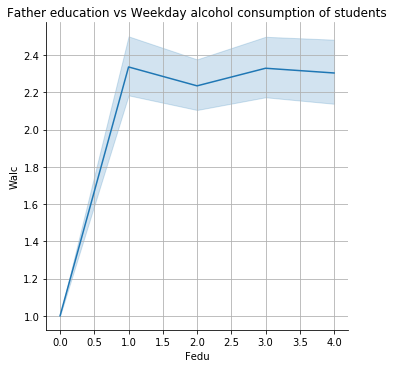

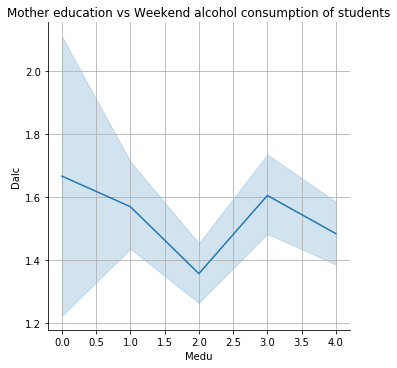

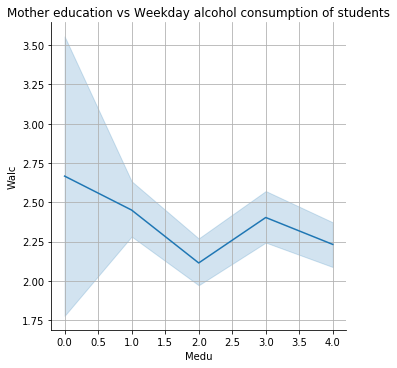

In [274]:
lin_plt_famedu_alc(my_dat)

####. The above plot shows that Mother education level and students acohol consumption have inversly related. Where as, Father education level and student alcohol consumption have directly related. This data makes sense because when male are rich or have enough income they more likely to be social and hang out with friend while they having some drinks. The father may also bring some drink at home which the kinds more likel have the chance to try. Also, if the father drinks, it has encouraging effect on his children to do it, so they will drink more. In conclusion, as father education level increased, the student alcohol consumption increased . On the contrary students from mother who has higher education tend to have less alcohol consumption.

In [275]:
# The sns line plot function 
def alc_absc_pl(dt):
    # select the target data
    ne_data = dt.drop(["famsize", "famsup"], axis = 1)
    # plotting command
    sns.relplot(x = "Dalc", y = "absences",data =ne_data, kind = "line")
    plt.title("Weekend Alcohol consumption vs Absence of the students") # Title the plot
    plt.grid() # add the grid to the plot
    
    sns.relplot(x = "Walc", y = "absences",data =ne_data, kind = "line")
    plt.title("Weekday Alcohol consumption vs Absence of the student")
    plt.grid()

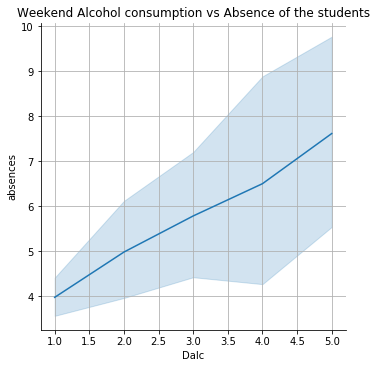

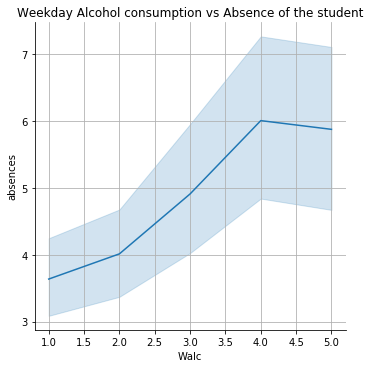

In [276]:
alc_absc_pl(my_dat)

###. The above plots show that the amount of alcohol consumption highly related to the student absences. When the students drink more alcohol they tend to absent from school. This has a negative impact on students academic success. The school system should follow up students who usually do not show up or leave the school earlier than the actual time.

# Machine Learning Analysis

In [277]:
from sklearn import linear_model, metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
ml_data = my_dat.drop(["G1", "G2", "G3"], axis=1)
# ml_data

In [278]:
X = ml_data.loc[:, ml_data.columns != 'Mean_Grade']
X = pd.get_dummies(X)
y = np.round(ml_data['Mean_Grade'])
  
# splitting X and y into training and testing sets  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, 
                                                    random_state=1) 
# create linear regression object 
reg = linear_model.LinearRegression() 
  
# train the model using the training sets 
reg.fit(X_train, y_train) 
y_pred = reg.predict(X_test)

# regression coefficients 
print('Coefficients: \n', reg.coef_) 
  
# variance score
print('Testing data Variance score: {}'.format(reg.score(X_test, y_test))) 
print('Training data Variance score : {}'.format(reg.score(X_train, y_train))) 
y_train_pred = reg.predict(X_train)  # generate the predict y values
y_test_pred = reg.predict(X_test)  # generate the test y values
## Calculate and printing the MSE and R^2

print("Traing data Mean squared error {}".format(mean_squared_error(y_train, y_train_pred)))
print("Testing data Mean squared error {}".format(mean_squared_error(y_test, y_pred)))
print("r_2 statistic:{}".format(r2_score(y_test, y_pred)))

Coefficients: 
 [ 0.53465921  0.50075718  0.06094024  0.33469223 -0.42939245 -0.04513155
 -0.04342436 -0.35699213  0.35699213  0.25193023 -0.25193023]
Testing data Variance score: 0.08641800987390214
Training data Variance score : 0.12438034841953528
Traing data Mean squared error 9.294955673114938
Testing data Mean squared error 9.309789704925475
r_2 statistic:0.08641800987390214


#### The above linear model for the student mean grade score works very well becasue the mean square error for the testing and training dataset are almost the same. We can develop a linear model with the given conficients and the model will works fine to determine the impact of the features. In conclusion, All the above analysis of the stduents data set there are associations between the students academic performace, parents education level, students alcohol consumption, and family size. Therfore, Finding out this correlation and being able to modeled above will helpful for the education and health ministries to work together to take action to reduce the number of students who dropout of school

## Reproducing your results

#### 1. We used Kaggle to find the different past reseach with a better datasets.  Second, we generate questions we would like to answer based on the dataset. We used a python 3.7 version. We downloaded, loaded to computer and then  cleaned the dataset.  Then,  we used different  commands to viualized with seaborn,  analysize and manipulate dataset,  develop machine learning algorithm using the sklearn packages .
